In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
from xgboost import XGBClassifier
MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    gaussian_process.GaussianProcessClassifier(),
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(), 
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    neighbors.KNeighborsClassifier(), 
    svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    svm.LinearSVC(), 
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    XGBClassifier()
       ] 

import warnings
warnings.filterwarnings('ignore')

D:\Python3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


## Read training data

In [2]:
df = pd.read_csv('E:/Experiments/YulanPeng/Wenwen/OSDFS/5DFS-train.csv',encoding='gbk')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Columns: 159 entries, ID to original_ngtdm_Strength
dtypes: float64(102), int64(56), object(1)
memory usage: 278.4+ KB


In [3]:
df.head()

,ID,patient,5yDFS,cli01,cli02,cli03,cli04,cli05,cli06,cli07,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,3,SICK0000053,0,1,41,2,1,0,2,3,...,0.005932,0.004502,0.892413,634.309034,0.004174,0.025478,0.034650,1651.539734,0.111554,35.270325
1,19,SICK0006140,0,1,40,1,1,0,1,0,...,0.013557,0.008920,0.851541,793.356047,0.008007,0.013646,0.044393,2273.786349,0.092157,92.240806
2,25,SICK0007137,1,1,39,1,1,0,2,1,...,0.014492,0.006806,0.890508,818.959013,0.004908,0.022152,0.026248,2910.847233,0.107077,60.080551
3,26,SICK0007154,1,2,45,2,1,0,2,1,...,0.002476,0.001838,0.822249,1366.279301,0.001703,0.020552,0.039183,628.267495,0.086383,26.964163
4,27,SICK0007192,1,1,55,2,1,0,2,0,...,0.038111,0.017261,0.845525,763.166227,0.012497,0.017526,0.050475,1352.372555,0.118779,60.753588


In [4]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['5yDFS']))}
class_mapping

{0: 0, 1: 1}

In [5]:
from sklearn.preprocessing import LabelEncoder
df['5yDFS'] = df['5yDFS'].map(class_mapping)
y_train = LabelEncoder().fit_transform(df['5yDFS'].values)
X0_train = df.iloc[:, 3:56].values
X1_train = df.iloc[:, 56:159].values
print(y_train.shape)
print(X0_train.shape)
print(X1_train.shape)

(224,)
(224, 53)
(224, 103)


In [6]:
feat_labels0 = df.columns[3:56] 
feat_labels1 = df.columns[56:159] 

## Read test data

In [7]:
df1 = pd.read_csv('E:/Experiments/YulanPeng/Wenwen/OSDFS/5DFS-test.csv',encoding='gbk')
class_mapping = {label: idx for idx, label in enumerate(np.unique(df1['5yDFS']))}
df1['5yDFS'] = df1['5yDFS'].map(class_mapping)
y_test = LabelEncoder().fit_transform(df1['5yDFS'].values)
X0_test = df1.iloc[:, 3:56].values
X1_test = df1.iloc[:, 56:159].values
print(y_test.shape)
print(X0_test.shape)
print(X1_test.shape)

(40,)
(40, 53)
(40, 103)


In [8]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X0_std = stdsc.fit_transform(X0_train)
X0_train = X0_std
X0_test = stdsc.transform(X0_test)
print(X0_train.shape)
print(X0_test.shape)

(224, 53)
(40, 53)


In [9]:
stdsc = StandardScaler()
X1_std = stdsc.fit_transform(X1_train)
X1_train = X1_std
X1_test = stdsc.transform(X1_test)
print(X1_train.shape)
print(X1_test.shape)

(224, 103)
(40, 103)


1    157
0     67
Name: 5yDFS, dtype: int64


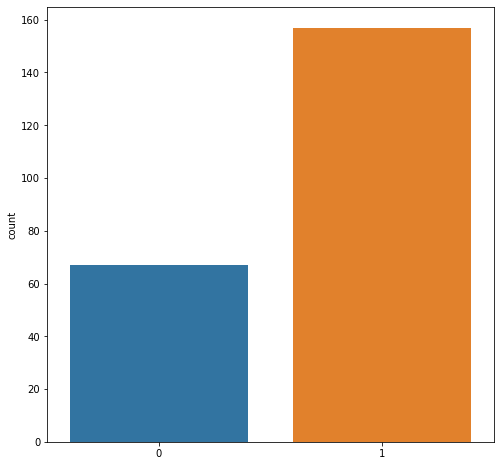

In [10]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
ax = sns.countplot(x=y_train, data=df) 
print(df['5yDFS'].value_counts())

0    23
1    17
Name: 5yDFS, dtype: int64


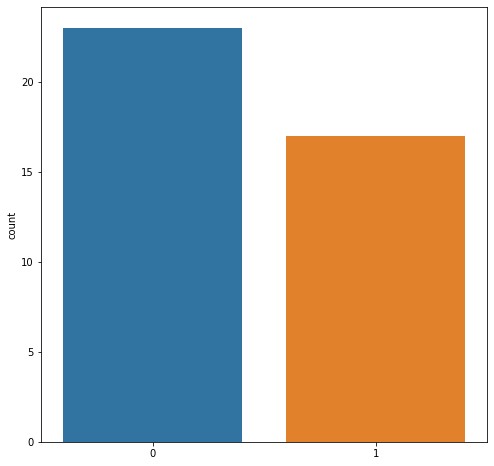

In [11]:
import seaborn as sns
ax = sns.countplot(x=y_test, data=df1)
print(df1['5yDFS'].value_counts())

## Data preprocessing

### Clinical features

In [12]:
from imblearn.over_sampling import SVMSMOTE
from imblearn.pipeline import make_pipeline
sm = SVMSMOTE(random_state=11)
X00_train, y00_train = sm.fit_sample(X0_train, y_train)

Using TensorFlow backend.


In [13]:
unique, count = np.unique(y00_train, return_counts=True)
y00_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y00_train_smote_value_count

{0: 157, 1: 157}

In [14]:
print(y00_train.shape)
print(X00_train.shape)

(314,)
(314, 53)


In [15]:
new_df = pd.DataFrame(X00_train)
new_df1 = pd.DataFrame(y00_train)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-0.489654,-0.845089,-0.116510,0.304439,-0.549841,0.088587,2.082602,-0.106449,3.193744,0.13484,...,0.811948,1.452966,-2.248122,-0.866645,0.093913,1.409492,-1.186845,-0.894483,-0.145590,-1.001090
1,-0.489654,-0.938894,-1.566417,0.304439,-0.549841,-1.234312,-0.826979,-1.596739,-0.313112,0.13484,...,0.811948,-0.688247,0.444816,-0.866645,1.086199,1.409492,-1.186845,-1.225182,-0.726224,-0.725859
2,-0.489654,-1.032700,-1.566417,0.304439,-0.549841,0.088587,0.142881,-0.106449,-0.313112,0.13484,...,-1.231606,-0.688247,-2.248122,0.519987,-2.138732,1.409492,0.842570,0.613507,0.114950,0.262310
3,1.434600,-0.469866,-0.116510,0.304439,-0.549841,0.088587,0.142881,-0.106449,-0.313112,0.13484,...,-1.231606,-0.688247,-2.248122,1.906618,-0.154159,-0.709476,-1.186845,1.036802,2.936234,-1.431944
4,-0.489654,0.468191,-0.116510,0.304439,-0.549841,0.088587,-0.826979,-0.106449,-0.313112,0.13484,...,0.811948,1.452966,0.444816,-0.866645,-1.270481,-0.709476,0.842570,1.473325,-0.056262,1.415284


### Radiomics features

In [16]:
from imblearn.over_sampling import SVMSMOTE
from imblearn.pipeline import make_pipeline
sm = SVMSMOTE(random_state=11)
X11_train, y11_train = sm.fit_sample(X1_train, y_train)

In [17]:
unique, count = np.unique(y00_train, return_counts=True)
y11_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y11_train_smote_value_count

{0: 157, 1: 157}

In [18]:
print(y11_train.shape)
print(X11_train.shape)

(314,)
(314, 103)


In [19]:
new_df = pd.DataFrame(X11_train)
new_df1 = pd.DataFrame(y11_train)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,-1.204275,-0.137078,-0.113638,-0.853490,-0.218981,-0.218981,-0.718369,-0.873765,0.609813,-0.733854,...,-0.307869,-0.375053,1.181654,-0.568644,-0.425051,0.398533,-0.502594,-0.349539,-0.307877,-0.877405
1,1.096373,0.370478,0.360179,1.358141,0.477652,0.477652,0.777750,1.482906,-0.762380,0.762498,...,-0.258611,-0.237091,-0.139114,-0.164709,-0.184933,-0.621682,0.321629,0.086545,-0.656685,0.874369
2,-0.525006,0.376973,0.352890,0.473489,0.396636,0.396636,0.674730,0.140067,-0.776924,0.699672,...,-0.252574,-0.303094,1.120072,-0.099685,-0.379104,0.111719,-1.213427,0.533010,-0.388386,-0.114520
3,-0.706979,0.302721,0.177942,0.141744,0.374878,0.374878,0.510836,-0.085862,-0.661556,0.534596,...,-0.330188,-0.458223,-1.085647,1.290353,-0.579844,-0.026184,-0.119128,-1.066669,-0.760511,-1.132809
4,1.170237,0.169477,-0.113638,1.468723,0.108465,0.108465,0.383233,1.246127,-0.604848,0.422377,...,-0.100007,0.023363,-0.333498,-0.241383,0.096315,-0.287135,0.836213,-0.559201,-0.177954,-0.093825


## Feature Selection

Accuracy: 100.00 % 


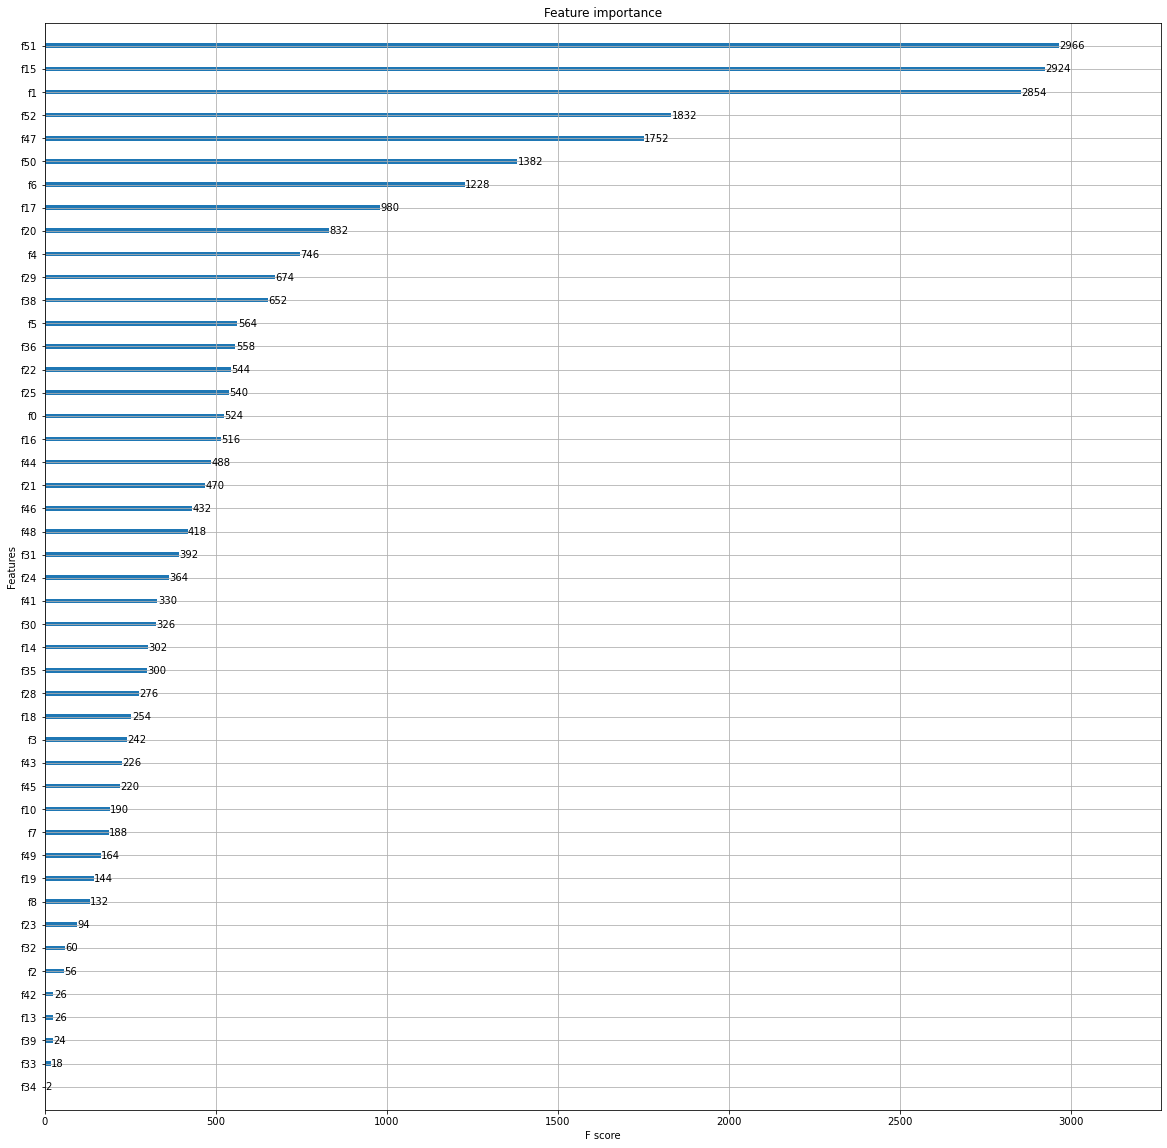

In [20]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
# set XGBoost's parameters
params = {
    'booster': 'gbtree',
    #'objective': 'binary:hinge',  #'binary:logistic', 
    'objective':'multi:softmax',
    'eval_metric':'auc',
    'num_class': 2, 
    #'gamma': 0.1,
    'max_depth': 10,
    #'alpha':1,
    'lambda': 1,
    #'subsample': 1,
    #'colsample_bytree': 1,
    #'min_child_weight': 3,
    #'scale_pos_weight':4,
    #'silent': 1,
    'eta': 0.01,
    'seed': 100,
    #'nthread': 4,    
}

plst = params.items()
# trian
dtrain = xgb.DMatrix(X00_train, y00_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

# test
dtest = xgb.DMatrix(X00_train)
ans = model.predict(dtest)

# calculate
cnt1 = 0
cnt2 = 0
for i in range(len(y00_train)):
    if ans[i] == y00_train[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# show the importance, for feature selection
xgb.plot_importance(model, importance_type='weight')
#plt.savefig('fig2-new.jpg',dpi=1200)
plt.show()

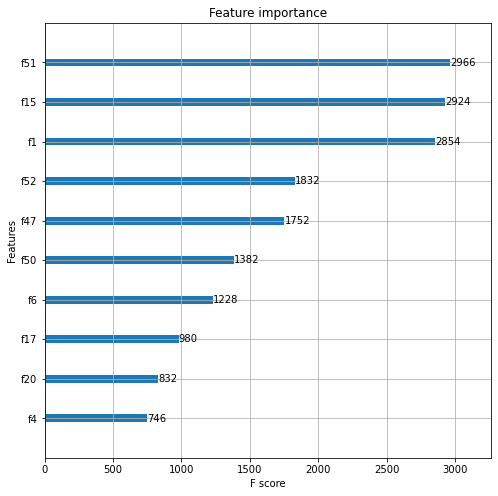

In [21]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
xgb.plot_importance(model,max_num_features=10, importance_type='weight') #or gain, cover.
plt.savefig('5DFS-1.jpg',dpi=1200)

In [22]:
feat_labels0[[51,15,1,52,47,50,6,17,20,4]]

Index(['cli52', 'cli16', 'cli02', 'cli53', 'cli48', 'cli51', 'cli07', 'cli18',
       'cli21', 'cli05'],
      dtype='object')

Accuracy: 100.00 % 


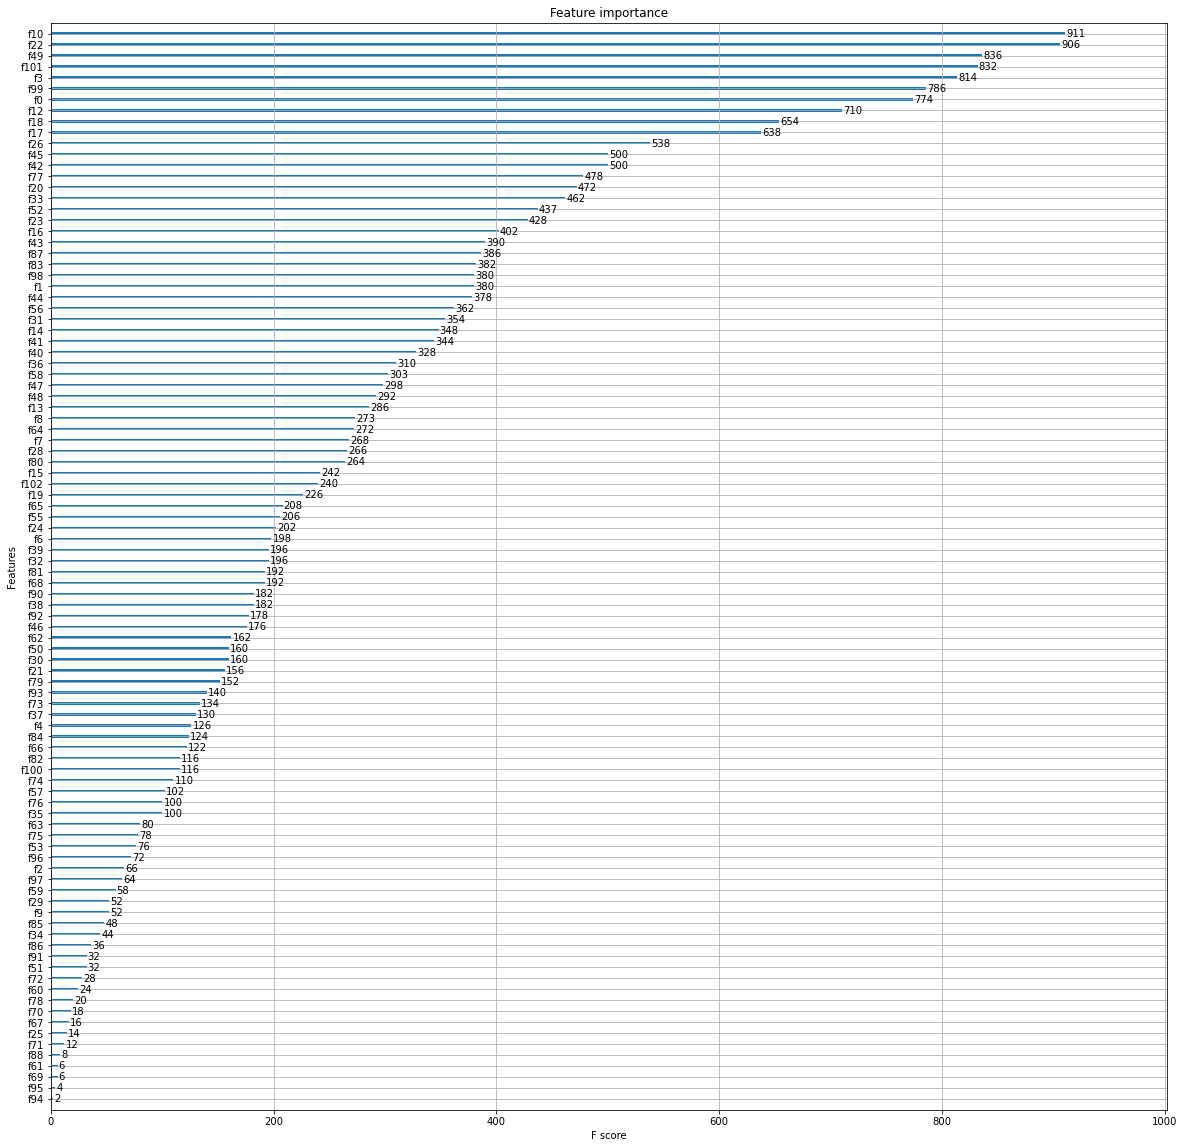

In [23]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
# set XGBoost's parameters
params = {
    'booster': 'gbtree',
    #'objective': 'binary:hinge',  #'binary:logistic', 
    'objective':'multi:softmax',
    'eval_metric':'auc',
    'num_class': 2, 
    #'gamma': 0.1,
    'max_depth': 10,
    #'alpha':1,
    'lambda': 1,
    #'subsample': 1,
    #'colsample_bytree': 1,
    #'min_child_weight': 3,
    #'scale_pos_weight':4,
    #'silent': 1,
    'eta': 0.01,
    'seed': 100,
    #'nthread': 4,    
}

plst = params.items()
# trian
dtrain = xgb.DMatrix(X11_train, y11_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

# test
dtest = xgb.DMatrix(X11_train)
ans = model.predict(dtest)

# calculate
cnt1 = 0
cnt2 = 0
for i in range(len(y11_train)):
    if ans[i] == y11_train[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# show the importance, for feature selection
xgb.plot_importance(model, importance_type='weight')
#plt.savefig('fig2-new.jpg',dpi=1200)
plt.show()

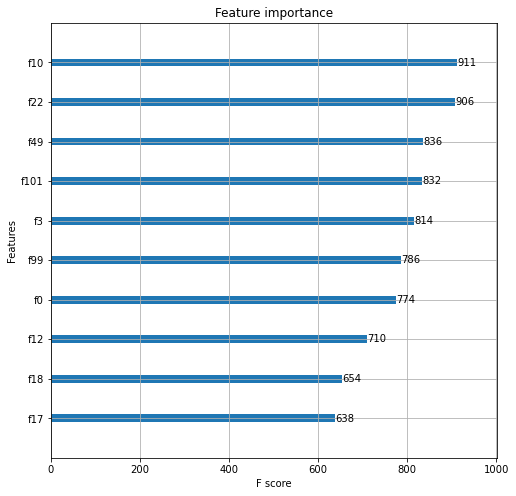

In [24]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
xgb.plot_importance(model,max_num_features=10, importance_type='weight') #or gain, cover.
plt.savefig('5DFS-2.jpg',dpi=1200)

In [25]:
feat_labels1[[10,22,49,101,3,99,0,12,18,17]]

Index(['original_shape_SurfaceVolumeRatio', 'original_firstorder_Minimum',
       'original_glcm_MaximumProbability', 'original_ngtdm_Contrast',
       'original_shape_Maximum2DDiameterRow', 'original_ngtdm_Coarseness',
       'original_shape_Elongation', 'original_firstorder_10Percentile',
       'original_firstorder_Maximum', 'original_firstorder_Kurtosis'],
      dtype='object')

In [26]:
X0 = X00_train[:,[51,15,1,52,47,50,6,17,20,4]]
X1 = X11_train[:,[10,22,49,101,3,99,0,12,18,17]]
X2 = X0_test[:,[51,15,1,52,47,50,6,17,20,4]]
X3 = X1_test[:,[10,22,49,101,3,99,0,12,18,17]]
y0 = y00_train
y1 = y11_train
y2 = y_test
y3 = y_test

print("the training clinical data:")
print(X0.shape)
print(y0.shape)
print("the training radiomics data:")
print(X1.shape) #
print(y1.shape)
print("the test clinical data:")
print(X2.shape) #
print(y2.shape)
print("the test radiomics data:")
print(X3.shape) #
print(y3.shape)

the training clinical data:
(314, 10)
(314,)
the training radiomics data:
(314, 10)
(314,)
the test clinical data:
(40, 10)
(40,)
the test radiomics data:
(40, 10)
(40,)


## Select modeling method

In [27]:
clf1 = LogisticRegression(penalty='l2',C=1, multi_class='auto',solver='liblinear',random_state=1)
clf2 = tree.DecisionTreeClassifier(random_state=1)
clf3 = ensemble.RandomForestClassifier(random_state=1)
clf4 = XGBClassifier(random_state=1)
clf5 = svm.SVC(probability=True, random_state=1)

### Clinical signature

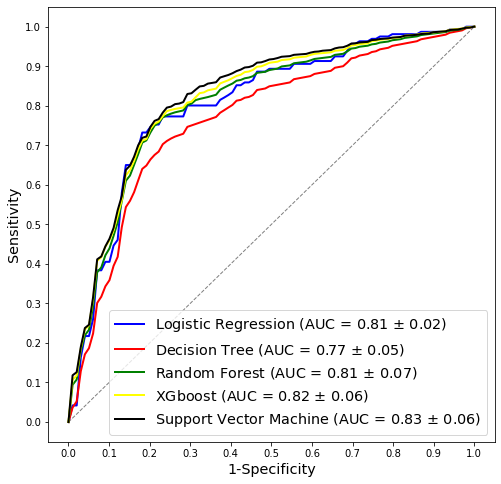

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import model_selection
from scipy import interp
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import auc, f1_score, roc_auc_score, roc_curve
from pylab import rcParams

cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

for train, test in cv.split(X0, y0):
    probas_ = clf1.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'Logistic Regression (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#############################################################
for train, test in cv.split(X0, y0):
    probas_ = clf2.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='red',label=r'Decision Tree (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
################################################################

for train, test in cv.split(X0, y0):
    probas_ = clf3.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='green',label=r'Random Forest (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X0, y0):
    probas_ = clf4.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='yellow',linestyle='-',label=r'XGboost (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X0, y0):
    probas_ = clf5.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='black',linestyle='-', label=r'Support Vector Machine (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

#################################################################
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

plt.savefig('5DFS-3.jpg',dpi=1200)
plt.show()

### Radiomics signature

In [29]:
clf1 = LogisticRegression(penalty='l2',C=1, multi_class='auto',solver='liblinear',random_state=1)
clf2 = tree.DecisionTreeClassifier(random_state=1)
clf3 = ensemble.RandomForestClassifier(random_state=1)
clf4 = XGBClassifier(random_state=1)
clf5 = svm.SVC(probability=True, random_state=1)

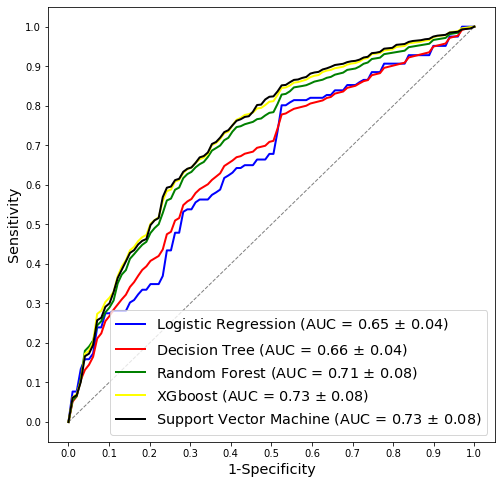

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import model_selection
from scipy import interp
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import auc, f1_score, roc_auc_score, roc_curve
from pylab import rcParams

cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

for train, test in cv.split(X1, y1):
    probas_ = clf1.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'Logistic Regression (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#############################################################
for train, test in cv.split(X1, y1):
    probas_ = clf2.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='red',label=r'Decision Tree (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
################################################################

for train, test in cv.split(X1, y1):
    probas_ = clf3.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='green',label=r'Random Forest (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X1, y1):
    probas_ = clf4.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='yellow',linestyle='-',label=r'XGboost (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X1, y1):
    probas_ = clf5.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='black',linestyle='-', label=r'Support Vector Machine (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

#################################################################
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

plt.savefig('5DFS-4.jpg',dpi=1200)
plt.show()

## Modeling & Validation

### Clinical Score

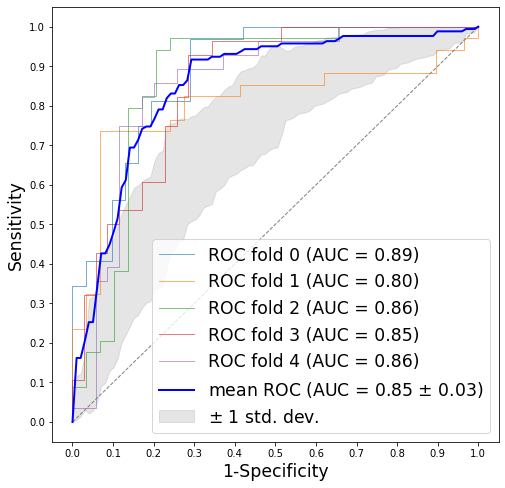

In [31]:
model = svm.SVC(probability=True, random_state=1)

matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

for train, test in cv.split(X0, y0):
    probas_ = model.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.xlabel('1-Specificity', fontsize = 'xx-large')
plt.ylabel('Sensitivity', fontsize = 'xx-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'xx-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

#plt.savefig('2OS-5.jpg',dpi=1200)
plt.show()

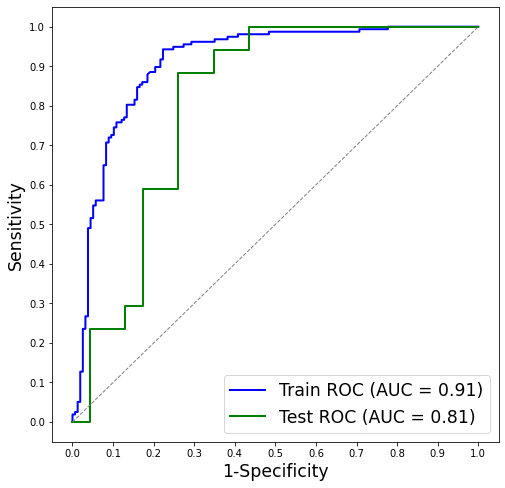

In [32]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
probas_ = model.predict_proba(X0)
fpr, tpr, thresholds = roc_curve(y0, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='blue', alpha=1, lw=2, linestyle='-',label='Train ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

probas_ = model.predict_proba(X2)
fpr, tpr, thresholds = roc_curve(y2, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='Test ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'xx-large')
plt.ylabel('Sensitivity', fontsize = 'xx-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'xx-large'
          )
plt.savefig('5DFS-5.jpg',dpi=1200)
plt.show()

In [33]:
Y0_Pred = model.predict(X0)
pd.crosstab(pd.Series(Y0_Pred, name = 'Predicted'), 
            pd.Series(df['5yDFS'], name = 'Actual'))

Actual,0,1
Predicted,,
0,51,18
1,16,139


In [34]:
Y2_Pred = model.predict(X2)
pd.crosstab(pd.Series(Y2_Pred, name = 'Predicted'), 
            pd.Series(df1['5yDFS'], name = 'Actual'))

Actual,0,1
Predicted,,
0,17,5
1,6,12


In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

print("Accuracy = " , accuracy_score(y0, Y0_Pred))
print("Precision = " ,precision_score(y0, Y0_Pred))
print("Recall = " ,recall_score(y0, Y0_Pred))
print("F1 Score = " ,f1_score(y0, Y0_Pred))

Accuracy =  0.8471337579617835
Precision =  0.8224852071005917
Recall =  0.8853503184713376
F1 Score =  0.8527607361963191


In [36]:
print("Accuracy = " , accuracy_score(y2, Y2_Pred))
print("Precision = " ,precision_score(y2, Y2_Pred))
print("Recall = " ,recall_score(y2, Y2_Pred))
print("F1 Score = " ,f1_score(y2, Y2_Pred))

Accuracy =  0.725
Precision =  0.6666666666666666
Recall =  0.7058823529411765
F1 Score =  0.6857142857142857


In [37]:
predictions = model.predict_proba(X0)
predictions

array([[0.72957362, 0.27042638],
       [0.30570698, 0.69429302],
       [0.246379  , 0.753621  ],
       [0.56815131, 0.43184869],
       [0.17875889, 0.82124111],
       [0.17166211, 0.82833789],
       [0.14291483, 0.85708517],
       [0.55794889, 0.44205111],
       [0.24947356, 0.75052644],
       [0.17165058, 0.82834942],
       [0.86042651, 0.13957349],
       [0.8906587 , 0.1093413 ],
       [0.31305892, 0.68694108],
       [0.17176443, 0.82823557],
       [0.1197475 , 0.8802525 ],
       [0.19362453, 0.80637547],
       [0.59601479, 0.40398521],
       [0.23130314, 0.76869686],
       [0.19478764, 0.80521236],
       [0.78295876, 0.21704124],
       [0.83321614, 0.16678386],
       [0.15312   , 0.84688   ],
       [0.17162621, 0.82837379],
       [0.85203304, 0.14796696],
       [0.15701494, 0.84298506],
       [0.82066237, 0.17933763],
       [0.29954422, 0.70045578],
       [0.14112215, 0.85887785],
       [0.12383942, 0.87616058],
       [0.15866089, 0.84133911],
       [0.

In [38]:
predictions1 = model.predict_proba(X2)
predictions1

array([[0.33953225, 0.66046775],
       [0.34309276, 0.65690724],
       [0.09053015, 0.90946985],
       [0.10872955, 0.89127045],
       [0.12329705, 0.87670295],
       [0.57590989, 0.42409011],
       [0.26969423, 0.73030577],
       [0.58964833, 0.41035167],
       [0.14020794, 0.85979206],
       [0.53181328, 0.46818672],
       [0.40499912, 0.59500088],
       [0.33399544, 0.66600456],
       [0.39277662, 0.60722338],
       [0.18983537, 0.81016463],
       [0.27511581, 0.72488419],
       [0.7293918 , 0.2706082 ],
       [0.16485546, 0.83514454],
       [0.55447614, 0.44552386],
       [0.51272338, 0.48727662],
       [0.14459121, 0.85540879],
       [0.6845158 , 0.3154842 ],
       [0.26135825, 0.73864175],
       [0.85174837, 0.14825163],
       [0.83326896, 0.16673104],
       [0.81146359, 0.18853641],
       [0.60822508, 0.39177492],
       [0.5880982 , 0.4119018 ],
       [0.74347936, 0.25652064],
       [0.16624695, 0.83375305],
       [0.83137903, 0.16862097],
       [0.

In [39]:
# save the data
pre_df = pd.DataFrame(predictions)
writer = pd.ExcelWriter('5DFS-CTra.xlsx')
pre_df.to_excel(writer,'page_1',float_format='%.5f')
writer.save() 

In [40]:
pre_df = pd.DataFrame(predictions1)
writer = pd.ExcelWriter('5DFS-CTe.xlsx')
pre_df.to_excel(writer,'page_1',float_format='%.5f')
writer.save() 

### Radiomic Score

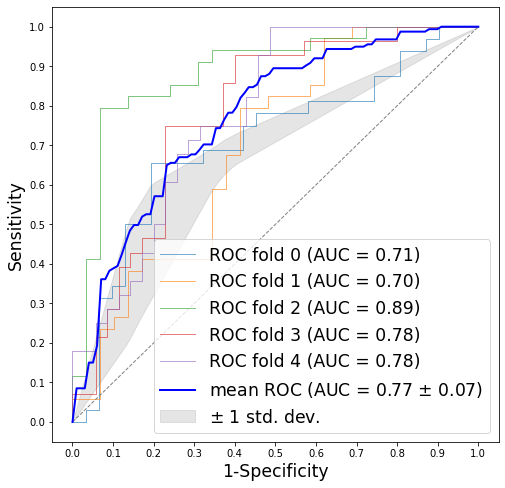

In [55]:
model = svm.SVC(probability=True, random_state=1)

matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

for train, test in cv.split(X1, y1):
    probas_ = model.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.xlabel('1-Specificity', fontsize = 'xx-large')
plt.ylabel('Sensitivity', fontsize = 'xx-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'xx-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

#plt.savefig('2OS-5.jpg',dpi=1200)
plt.show()

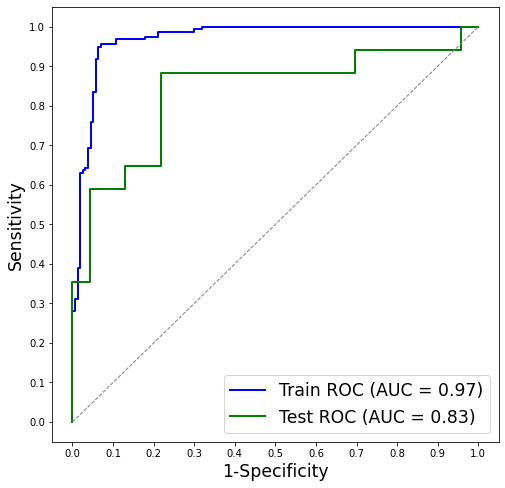

In [56]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
probas_ = model.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='blue', alpha=1, lw=2, linestyle='-',label='Train ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

probas_ = model.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='Test ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'xx-large')
plt.ylabel('Sensitivity', fontsize = 'xx-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'xx-large'
          )
plt.savefig('5DFS-6.jpg',dpi=1200)
plt.show()

In [57]:
Y1_Pred = model.predict(X1)
pd.crosstab(pd.Series(Y1_Pred, name = 'Predicted'), 
            pd.Series(df['5yDFS'], name = 'Actual'))

Actual,0,1
Predicted,,
0,59,7
1,8,150


In [58]:
Y3_Pred = model.predict(X3)
pd.crosstab(pd.Series(Y3_Pred, name = 'Predicted'), 
            pd.Series(df1['5yDFS'], name = 'Actual'))

Actual,0,1
Predicted,,
0,22,8
1,1,9


In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

print("Accuracy = " , accuracy_score(y1, Y1_Pred))
print("Precision = " ,precision_score(y1, Y1_Pred))
print("Recall = " ,recall_score(y1, Y1_Pred))
print("F1 Score = " ,f1_score(y1, Y1_Pred))

Accuracy =  0.9426751592356688
Precision =  0.9316770186335404
Recall =  0.9554140127388535
F1 Score =  0.9433962264150944


In [60]:
print("Accuracy = " , accuracy_score(y3, Y3_Pred))
print("Precision = " ,precision_score(y3, Y3_Pred))
print("Recall = " ,recall_score(y3, Y3_Pred))
print("F1 Score = " ,f1_score(y3, Y3_Pred))

Accuracy =  0.775
Precision =  0.9
Recall =  0.5294117647058824
F1 Score =  0.6666666666666667


In [61]:
predictions = model.predict_proba(X1)
predictions

array([[0.11330879, 0.8866912 ],
       [0.9266244 , 0.0733756 ],
       [0.24064517, 0.7593548 ],
       [0.21946788, 0.7805321 ],
       [0.12668061, 0.8733194 ],
       [0.41222674, 0.58777326],
       [0.11289978, 0.8871002 ],
       [0.37410384, 0.62589616],
       [0.22030747, 0.77969253],
       [0.23107272, 0.7689273 ],
       [0.83828527, 0.16171473],
       [0.37967688, 0.6203231 ],
       [0.02676141, 0.9732386 ],
       [0.2786315 , 0.7213685 ],
       [0.17661858, 0.8233814 ],
       [0.21727687, 0.7827231 ],
       [0.82558775, 0.17441228],
       [0.20516193, 0.7948381 ],
       [0.24056357, 0.7594364 ],
       [0.59385806, 0.40614194],
       [0.8049221 , 0.19507788],
       [0.21741998, 0.78258   ],
       [0.12712455, 0.87287545],
       [0.28833967, 0.7116603 ],
       [0.22193718, 0.7780628 ],
       [0.8379853 , 0.16201474],
       [0.28128368, 0.7187163 ],
       [0.38725156, 0.61274844],
       [0.13988471, 0.8601153 ],
       [0.30365592, 0.6963441 ],
       [0.

In [62]:
predictions1 = model.predict_proba(X3)
predictions1

array([[0.3240884 , 0.6759116 ],
       [0.56204987, 0.43795013],
       [0.56225586, 0.43774417],
       [0.0234772 , 0.9765228 ],
       [0.16114295, 0.83885705],
       [0.7046993 , 0.29530072],
       [0.84385943, 0.1561406 ],
       [0.948945  , 0.05105499],
       [0.14377749, 0.8562225 ],
       [0.64937633, 0.35062367],
       [0.62680197, 0.37319803],
       [0.12709194, 0.87290806],
       [0.62043524, 0.37956476],
       [0.51560307, 0.48439693],
       [0.6726147 , 0.32738528],
       [0.33623046, 0.66376954],
       [0.26058745, 0.73941255],
       [0.13030559, 0.8696944 ],
       [0.18695289, 0.8130471 ],
       [0.3814981 , 0.6185019 ],
       [0.80841637, 0.19158366],
       [0.90744454, 0.09255549],
       [0.8392077 , 0.16079229],
       [0.94655514, 0.05344484],
       [0.74887395, 0.25112608],
       [0.8758261 , 0.12417391],
       [0.5744214 , 0.4255786 ],
       [0.6975246 , 0.3024754 ],
       [0.8851912 , 0.11480877],
       [0.87120676, 0.12879324],
       [0.

In [63]:
# save the data
pre_df = pd.DataFrame(predictions)
writer = pd.ExcelWriter('5DFS-RTra.xlsx')
pre_df.to_excel(writer,'page_1',float_format='%.5f')
writer.save() 

In [64]:
pre_df = pd.DataFrame(predictions1)
writer = pd.ExcelWriter('5DFS-RTest.xlsx')
pre_df.to_excel(writer,'page_1',float_format='%.5f')
writer.save() 